# Save downscaled images to specified directory

In [1]:
import sys
sys.path.append('..')

In [2]:
from src import dataset
import importlib
importlib.reload(dataset)

from torchvision.utils import save_image

In [3]:
# for_diffusion=True means that we don't use data augmentation when loading images
dl, sizes, classes = dataset.load_downscaled_xray_data("../data/chest_xray", for_diffusion=True, batch_size=8, return_val_set=False, load_as_rgb=False)

In [10]:
len(dl['train'].dataset), len(dl['test'].dataset)

(5232, 624)

In [12]:
def save_n_images(dataloader, n, save_dir, image_key=0, label_key=1):
    # Save n images from the provided dataloader to specified path
    n_saved = 0
    for i, batch in enumerate(dataloader):
        # Save each image in batch
        for j, (image, label) in enumerate(zip(batch[image_key], batch[label_key])):
            save_image(image, f"{save_dir}/{label}-{i}-{j}.png")
            n_saved += 1
            if n_saved >= n:
                return

In [37]:
!ls ../data/metric-comparison/fmnist/real-test
# !rm ../data/metric-comparison/fmnist/real-train/*

In [38]:
dl

{'train': <torch.utils.data.dataloader.DataLoader at 0x7f69771ae700>,
 'test': <torch.utils.data.dataloader.DataLoader at 0x7f69771ae790>}

In [13]:
train_dl = dl["train"]
test_dl = dl["test"]

save_n_images(train_dl, 1000, "../data/metric-comparison/xray/real-train-no-aug")
# 624 images in test set
save_n_images(test_dl, 624, "../data/metric-comparison/xray/real-test")

## Save a plot that looks like the generated images for comparison

In [33]:
train_dl = dl["test"]
# Get 10 images and labels and plot them with labels
images, labels = next(iter(train_dl))
# Convert to numpy
images = images.numpy()[:10]
labels = list(labels.numpy()[:10])

In [34]:
type(images), type(labels)

(numpy.ndarray, list)

In [35]:
from src import viz

In [36]:
label_map = {0: "Normal", 1: "Pneumonia"}

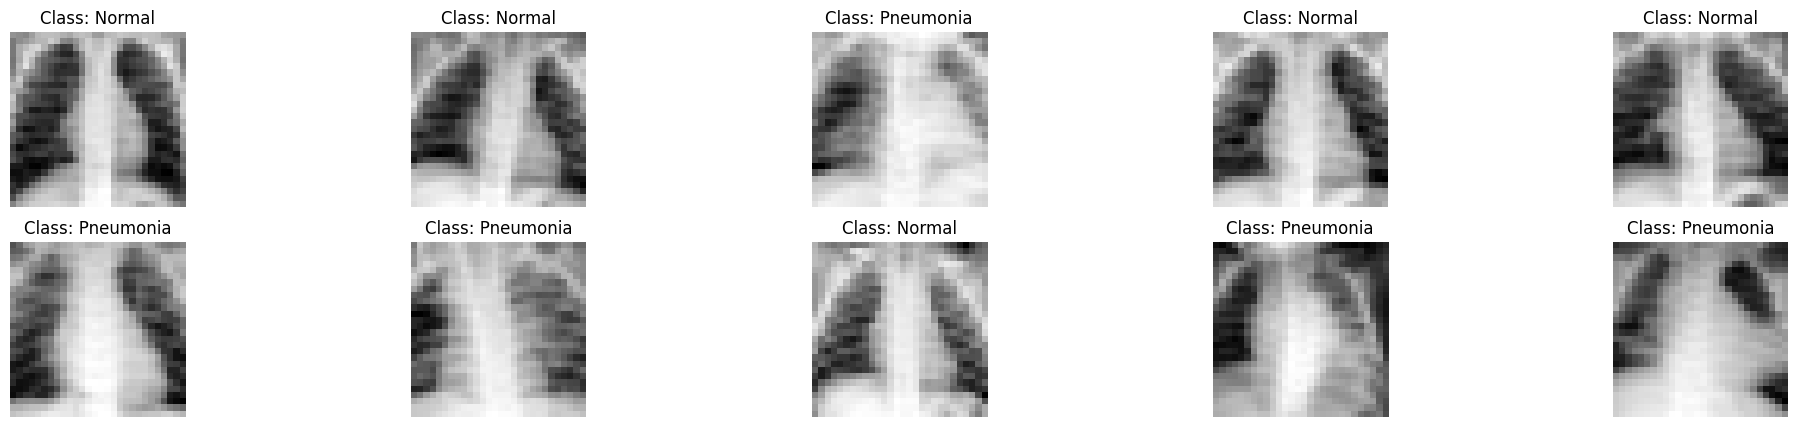

In [37]:
viz.plot_generated_images(images, labels, label_map, save_path="../results/diffusion/generated-images/real-images.png", show=True)